# Effect of Covid on Housing Market in the U.S.
### STA 141B Final Project
Sarah Shaik </br>
Daniel Woo </br>
Henman Tan </br>
Junxi Chen </br>
Shanshan Chen </br>

# Introduction

### In this project we are going to look at the trends in the housing market during Covid years 2020-present and analyze how Covid has affected the housing market all over the U.S. We analyze trends for big and small cities and also compare home purchase to rental choice. The data we use will be scraped and data frames will vbe created from that. Thereafter, we will conduct analysis on our data. 

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import urllib.request
import csv
import json
import pandas as pd

# Data Scraping

The data we will use will be from Zillow (https://www.zillow.com/research/data/). It contains information about the cities (column name: RegionName) and median home prices ranging from each month of 2018 to 2021. The columns are (2018-01-30, 2018-2-28 … 2021-9-30, 2021-10-31). 

Other columns include: 
Region Type (whether state or country)
RegionID (index of each entry) 
SizeRank (rank of the most populated city, ex NYC is ranked as #1 and LA as #2 and Gainsville, GA ranked at #229)
StateName (name of the state the city belongs to). 

In [2]:
# Data can be found here: https://www.zillow.com/research/data/
def parse():
    r = requests.get('https://www.zillow.com/research/data/') #download the webpage
    soup = bs(r.text) #create beautiful soup object 
    divs = soup.find_all(
        'div', {'class': ['form-group', 'select-wrapper', 'data-dropdown-2']}) #find all dividers with class of form-group, select-wrapper,data-dropdown-2
    vls = []
    for d in divs: #iterate through dividers
        try:
            ln = d.find('option') #look for the options 
            print(ln['value']) 
            vls.append(ln['value']) #append the option from our dividers 
        except:
            break
    return vls

parse()
vls = parse()

print(vls)

ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted($)
https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1638985279
ZHVF (Forecast), All Homes (SFR, Condo/Co-op), Smoothed, Seasonally Adjusted, Mid-Tier (YoY%)
https://files.zillowstatic.com/research/public_csvs/zhvf/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1638985279
ZORI (Smoothed, Seasonally Adjusted): All Homes Plus Multifamily Time Series ($)
https://files.zillowstatic.com/research/public_csvs/zori/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1638985279
For-Sale Inventory (Smooth, All Homes, Monthly)
https://files.zillowstatic.com/research/public_csvs/invt_fs/Metro_invt_fs_uc_sfrcondo_sm_month.csv?t=1638985279
Median List Price (Smooth, All Homes, Monthly)
https://files.zillowstatic.com/research/public_csvs/mlp/Metro_mlp_uc_sfrcondo_sm_month.csv?t=1638985279
Sales Count Nowcast (Raw, All Homes)
https://files.zillowstatic.com/research/pu

In [3]:
# Gives us the ZHVI values over time It reflects the typical value for homes in the 35th to 65th percentile range.
# Uses this CSV: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1637624134
def zhvi():
    url = vls[1]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

zhvi()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231193.0,231998.0,233231.0,235576.0,238089.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130035.0,130139.0,130225.0,130437.0,130658.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,81702.0,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,753874,930,"Craig, CO",Msa,CO,94741.0,95085.0,95668.0,96360.0,97075.0,...,NaN,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,136993.0,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0


In [4]:
# Gives us the ZORI values over time which is computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region
# Uses this CSV: https://files.zillowstatic.com/research/public_csvs/zori/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv?t=1637624134
def zori():
    zori = vls[5]
    zoridf = pd.read_csv(zori)
    return zoridf

zori()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1719.0,1730,1740.0,1750,1761,1771,1782,...,2347,2366,2384,2402,2421.0,2440,2459,2480,2500.0,2521.0
3,394463,"Chicago, IL",3,1374.0,1378,1381.0,1385,1388,1392,1395,...,1583,1591,1599,1607,1615.0,1624,1633,1642,1652.0,1661.0
4,394514,"Dallas-Fort Worth, TX",4,1125.0,1129,1132.0,1136,1139,1143,1147,...,1480,1498,1516,1534,1552.0,1571,1589,1608,1628.0,1647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,394549,"Durham, NC",104,1102.0,1105,1109.0,1112,1116,1119,1123,...,1393,1407,1420,1434,1448.0,1462,1476,1491,1506.0,1520.0
101,394995,"Port St. Lucie, FL",119,1057.0,1065,1073.0,1081,1089,1097,1104,...,1703,1732,1760,1789,1818.0,1848,1877,1907,1938.0,1968.0
102,394602,"Fort Collins, CO",159,1213.0,1219,1226.0,1233,1239,1246,1253,...,1581,1594,1608,1621,1634.0,1648,1662,1676,1690.0,1704.0
103,394405,"Boulder, CO",162,1502.0,1509,1517.0,1524,1532,1540,1548,...,2006,2022,2038,2054,2070.0,2087,2103,2119,2136.0,2152.0


In [5]:
# Gives us the median list price over time 
# Uses this CSV: https://files.zillowstatic.com/research/public_csvs/mlp/Metro_mlp_uc_sfrcondo_sm_month.csv?t=1637624134
def median():
    median = vls[9]
    mediandf = pd.read_csv(median)
    return mediandf

median()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,271600.0,272967.0,279333.0,288667.0,295633.0,...,333533.0,333850.0,340362.0,353728.0,367045.0,378267.0,381567.0,379933.0,376633.0,375000.0
1,394913,1,"New York, NY",Msa,NY,517967.0,523000.0,534333.0,544667.0,554666.0,...,661666.0,668000.0,673000.0,675000.0,675000.0,666667.0,658000.0,643200.0,636533.0,631867.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798333.0,802667.0,818000.0,835000.0,848300.0,...,996997.0,998698.0,1005698.0,1006364.0,1006666.0,999666.0,991333.0,971333.0,946667.0,931633.0
3,394463,3,"Chicago, IL",Msa,IL,301000.0,305967.0,319300.0,335967.0,345967.0,...,331333.0,331667.0,338300.0,346633.0,352967.0,354667.0,354633.0,348267.0,339933.0,332967.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,341996.0,345330.0,351663.0,359830.0,366163.0,...,350726.0,352141.0,357025.0,365358.0,374884.0,383333.0,390167.0,393500.0,396500.0,397667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,394528,90,"Daytona Beach, FL",Msa,FL,269600.0,270300.0,271833.0,274833.0,279667.0,...,293410.0,297110.0,303500.0,314467.0,324467.0,336078.0,341612.0,346278.0,348000.0,352967.0
91,394531,91,"Des Moines, IA",Msa,IA,281600.0,285967.0,292293.0,297293.0,299593.0,...,273633.0,277767.0,283300.0,291378.0,301725.0,311707.0,319628.0,320032.0,317550.0,314217.0
92,395006,100,"Provo, UT",Msa,UT,389707.0,397680.0,408503.0,413706.0,409865.0,...,511346.0,515076.0,510630.0,512444.0,520778.0,537478.0,546633.0,549967.0,548467.0,545533.0
93,394549,104,"Durham, NC",Msa,NC,362699.0,367241.0,375112.0,382984.0,386785.0,...,427593.0,431818.0,442273.0,466005.0,485372.0,495967.0,487633.0,480160.0,476526.0,478160.0


In [6]:
# Gives us the Zillow Home Value Forecast (ZHVF) which is the one-year forecast of the Zillow Home Values Index (ZHVI)
def zhvf():
    url = vls[3]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

zhvf()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2022-10-31,13.6
1,Msa,"Aberdeen, SD",SD,NaN,NaN,2022-10-31,8.0
2,Msa,"Aberdeen, WA",WA,NaN,NaN,2022-10-31,20.1
3,Msa,"Abilene, TX",TX,NaN,NaN,2022-10-31,11.6
4,Msa,"Ada, OK",OK,NaN,NaN,2022-10-31,12.3
...,...,...,...,...,...,...,...
23462,Zip,99712,AK,Fairbanks North Star Borough,Fairbanks,2022-10-31,8.9
23463,Zip,99714,AK,Fairbanks North Star Borough,Salcha,2022-10-31,5.4
23464,Zip,99801,AK,Juneau Borough,Juneau,2022-10-31,8.2
23465,Zip,99824,AK,Juneau Borough,Juneau,2022-10-31,8.6


In [7]:
# Gives us for sale inventory which is the count of unique listings that were active at any time in a given month.
def fsi():
    url = vls[7]
    df = pd.read_csv(url)
    count = len(df.columns)
    return df

fsi()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,1427909.0,1385346.0,1442557.0,1529778.0,1631645.0,...,1053828.0,974066.0,962689.0,944961.0,980620.0,1010612.0,1055726.0,1100059.0,1116567.0,1103788.0
1,394913,1,"New York, NY",Msa,NY,68934.0,68508.0,73030.0,79963.0,85976.0,...,63693.0,59401.0,58657.0,59266.0,61377.0,63796.0,65300.0,65536.0,63953.0,62220.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,20081.0,19915.0,21870.0,23791.0,25757.0,...,20646.0,19414.0,19913.0,20251.0,20694.0,20787.0,21361.0,21805.0,21637.0,20776.0
3,394463,3,"Chicago, IL",Msa,IL,42815.0,41139.0,44766.0,49325.0,53872.0,...,36968.0,33295.0,32883.0,33204.0,35630.0,37719.0,39713.0,41154.0,41284.0,40272.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,24283.0,23206.0,24346.0,26749.0,29536.0,...,23662.0,21461.0,21041.0,20784.0,21797.0,22541.0,23736.0,24760.0,24994.0,24094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,394767,929,"Lamesa, TX",Msa,TX,28.0,32.0,35.0,36.0,37.0,...,29.0,27.0,24.0,28.0,34.0,39.0,38.0,36.0,34.0,32.0
913,753874,930,"Craig, CO",Msa,CO,120.0,112.0,110.0,112.0,121.0,...,105.0,89.0,81.0,80.0,77.0,73.0,69.0,74.0,80.0,85.0
914,394968,931,"Pecos, TX",Msa,TX,13.0,14.0,15.0,14.0,15.0,...,22.0,24.0,24.0,25.0,25.0,25.0,24.0,25.0,26.0,28.0
915,395188,932,"Vernon, TX",Msa,TX,19.0,20.0,21.0,27.0,32.0,...,17.0,15.0,13.0,13.0,13.0,15.0,19.0,23.0,26.0,26.0


# Data Analysis

### Compare big cities and small cities across United States and their home value index trend over the years. Compare changes in prices before 2020 and post 2020

#### We choose four cities, two big cities (most populaated) from each of the coasts such as New York City, NY and Los Angeles, CA and two small cities from central America (least populated) such as Ann Harbor, MI and Lincoln, NE

For New York city, from the graph below we see that in New York, the prices for the homes fell between 2008-2011. This might have been due to the 2008 recession. Starting from 2018, we see a stark increaase in the home prices. Through covid years, i.e. 2020-present, we see that the home prices have gone up. 

<AxesSubplot:title={'center':'NYC, NY ZHVI Over Time'}>

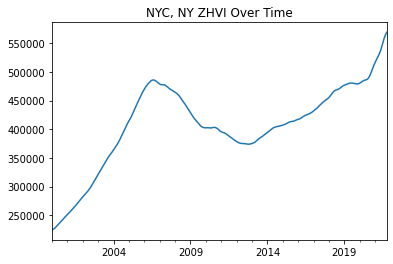

In [14]:
zhvi_df = zhvi()
nyc_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394913]

nyc_zhvi_df.columns = pd.to_datetime(nyc_zhvi_df.columns)
nyc_zhvi_df.T.plot(legend = False, title = 'NYC, NY ZHVI Over Time')

For Los Angeles city, from the graph below we see that the prices for the homes fell between 2008-2011. Similar to the graph we see for NYC, this might have been due to the 2008 recession. However starting from 2014, we see a rapid increase in the home prices and through covid years, i.e. 2020-present, we see that the home prices have gone up. 

<AxesSubplot:title={'center':'Los Angeles, CA ZHVI Over Time'}>

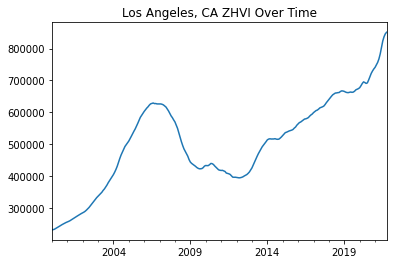

In [15]:
zhvi_df = zhvi()
la_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 753899]

la_zhvi_df.columns = pd.to_datetime(la_zhvi_df.columns)
la_zhvi_df.T.plot(legend = False, title = 'Los Angeles, CA ZHVI Over Time')

In Ann Arbor, MI, from the graph below we see that the prices for the homes again fell between 2008-2012 due to the recession. Starting from 2012, the prices went up much more steeper than those we see in NYC and LA. 

<AxesSubplot:title={'center':'Ann Arbor, MI ZHVI Over Time'}>

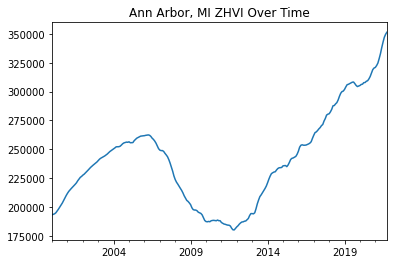

In [16]:
zhvi_df = zhvi()
aa_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394332]

aa_zhvi_df.columns = pd.to_datetime(aa_zhvi_df.columns)
aa_zhvi_df.T.plot(legend = False, title = 'Ann Arbor, MI ZHVI Over Time')

In Lincoln,NE, from the graph below we see a slight drop in the home prices between 2008-2019 due to the recession. However the drop in the prices were not as bad as we see for NYC, LA and Ann Arbor. Starting from 2016, the prices went up much more steeper than the drop that happened during the recession. During covid years especially the prices of the homes have gone up and there is a steep increase in the prices. 

<AxesSubplot:title={'center':'Lincoln, NE ZHVI Over Time'}>

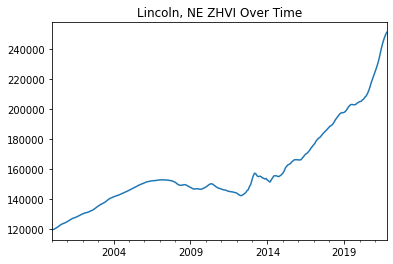

In [17]:
zhvi_df = zhvi()
lin_zhvi_df = zhvi_df.iloc[:,5:][zhvi_df.RegionID == 394796]

lin_zhvi_df.columns = pd.to_datetime(lin_zhvi_df.columns)
lin_zhvi_df.T.plot(legend = False, title = 'Lincoln, NE ZHVI Over Time')

Overall from the graphs above we see that the last most prominent trend in the housing market was during the 2008 recession where all the home prices fell. However during covid years, i.e. from 2020-present, the home prices saw a steep incrase all over. It is worth noting that even the smaller cities saw an increase in the home prices, which means that the demand for homes increased during Covid time as more people got displaced from their jobs in bigger cities or just chose to change their lifestyles. 